# 1. choose a dataset (I choose house price prediction regression data)

# 2. Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.stats as stats 
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  

C:\Users\fraud\AppData\Local\Temp\ipykernel_16656\520956343.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 3. Load the dataset using pandas module

In [2]:
df = pd.read_csv(r"C:\Users\fraud\Desktop\ML Project\House_pred (REGRESSION)\house_price_pred_data.csv")
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   int64  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 431.4 KB


In [4]:
# removing outliers
zs = stats.zscore(df) 
threshold = 3 
print("Size before removing outliers: ", df.shape)
df = df[(zs <= threshold).all(axis=1)] 
print("Size after removing outliers: ", df.shape)

Size before removing outliers:  (4600, 12)
Size after removing outliers:  (4244, 12)


# 4. Feature selection (x,y) , Split data and scaling data (standard scalar)

In [5]:
x = df.iloc[ : , 1:12].values
y = df.iloc[ : , 0].values

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=42)

print("xtrain: ", xtrain.shape)
print("xtest: ", xtest.shape)
print("x: ", x.shape)
print("y: ", y.shape)

xtrain:  (3183, 11)
xtest:  (1061, 11)
x:  (4244, 11)
y:  (4244,)


In [6]:
# feature scaling
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

# Random Forest Regressor

In [7]:
#5. model creation by invoking algorithms
rf = RandomForestRegressor()
#6. model training by fitting (xtrain & ytrain data)
rf.fit(xtrain, ytrain) 
#7. model prediction (ypre_rf)-'using xtest'
ypre_rf = rf.predict(xtest)
#8. calculate error using output metrics
rf_mse = mean_squared_error(ytest, ypre_rf)
rf_mae = mean_absolute_error(ytest, ypre_rf)
rf_r2 = r2_score(ytest, ypre_rf)
print("Mean Squared Error: ",rf_mse)
print("Mean Absolute Error: ",rf_mae)
print("R-Square (R2): ", rf_r2)

Mean Squared Error:  43508700947.19712
Mean Absolute Error:  140492.67697892114
R-Square (R2):  0.416644516672915


# Linear regression

In [8]:
#5. model creation by invoking algorithms
lr = LinearRegression()
#6. model training by fitting (xtrain & ytrain data)
lr.fit(xtrain, ytrain)
#7. model prediction (ypre_lr)-'using xtest'
ypre_lr = lr.predict(xtest)
#8. calculate error using output metrics
lr_mse = mean_squared_error(ytest, ypre_lr)
lr_mae = mean_absolute_error(ytest, ypre_lr)
lr_r2 = r2_score(ytest, ypre_lr)
print("Mean Squared Error: ",lr_mse)
print("Mean Absolute Error: ",lr_mae)
print("R-Square (R2): ", lr_r2)

Mean Squared Error:  41203152652.96313
Mean Absolute Error:  139597.77103050725
R-Square (R2):  0.44755682180353873


# DecisionTree Regressor

In [9]:
#5. model creation by invoking algorithms
dt = DecisionTreeRegressor()
#6. model training by fitting (xtrain & ytrain data)
dt.fit(xtrain, ytrain)
#7. model prediction (ypre_dt)-'using xtest'
ypre_dt = dt.predict(xtest)
#8. calculate error using output metrics
dt_mse = mean_squared_error(ytest, ypre_dt)
dt_mae = mean_absolute_error(ytest, ypre_dt)
dt_r2 = r2_score(ytest, ypre_dt)
print("Mean Squared Error: ",dt_mse)
print("Mean Absolute Error: ",dt_mae)
print("R-Square (R2): ", dt_r2)

Mean Squared Error:  73361197637.17154
Mean Absolute Error:  186711.78460622052
R-Square (R2):  0.01638853899537207


# KNN

In [10]:
#5. model creation by invoking algorithms
kn = KNeighborsRegressor()
#6. model training by fitting (xtrain & ytrain data)
kn.fit(xtrain, ytrain)
#7. model prediction (ypre_kn)-'using xtest'
ypre_kn = kn.predict(xtest)
#8. calculate error using output metrics
kn_mse = mean_squared_error(ytest, ypre_kn)
kn_mae = mean_absolute_error(ytest, ypre_kn)
kn_r2 = r2_score(ytest, ypre_kn)
print("Mean Squared Error: ",kn_mse)
print("Mean Absolute Error: ",kn_mae)
print("R-Square (R2): ", kn_r2)

Mean Squared Error:  48036699800.623055
Mean Absolute Error:  150717.13595768143
R-Square (R2):  0.3559340633120929


# Final report

In [11]:
report = pd.DataFrame({'model':['Random Forest','Linear regression','decision tree','KNN'],
                      'mean_squared_error':[rf_mse,lr_mse,dt_mse,kn_mse],
                      'mean_Absolute_error':[rf_mae,lr_mae,dt_mae,kn_mae],
                       'R-Square (R2)':[rf_r2,lr_r2,dt_r2,kn_r2]})

report

,model,mean_squared_error,mean_Absolute_error,R-Square (R2)
0,Random Forest,4.350870e+10,140492.676979,0.416645
1,Linear regression,4.120315e+10,139597.771031,0.447557
2,decision tree,7.336120e+10,186711.784606,0.016389
3,KNN,4.803670e+10,150717.135958,0.355934


Text(0.5, 1.0, 'Mean Square Error')

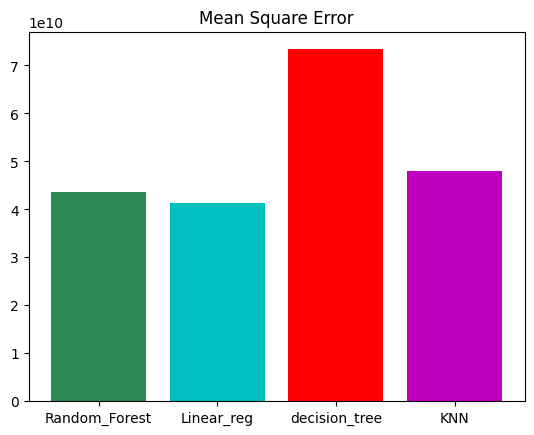

In [12]:
# visualizing the mse of all four algorithm
res = [rf_mse,lr_mse,dt_mse,kn_mse]
color_code = ['seagreen','c','r','m']
plt.bar(['Random_Forest','Linear_reg','decision_tree','KNN'],res, color = color_code)
plt.title('Mean Square Error')

Text(0.5, 1.0, 'R Square Error')

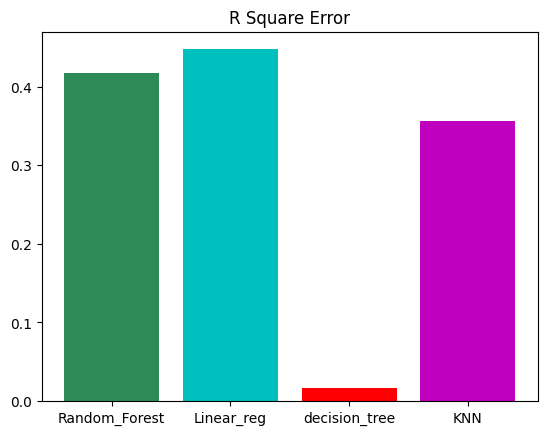

In [13]:
# visualizing the R square of all four algorithm
res = [rf_r2,lr_r2,dt_r2,kn_r2]
color_code = ['seagreen','c','r','m']
plt.bar(['Random_Forest','Linear_reg','decision_tree','KNN'],res, color = color_code)
plt.title('R Square Error')

# Conclusion